<a href="https://colab.research.google.com/github/kimiyayam/macro/blob/main/MLB_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd 
from google.colab import drive
drive.mount('/content/drive')
Movie_data = pd.read_csv("/content/mpst_full_data.csv")
Movie_data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,imdb_id,title,plot_synopsis,tags,split,synopsis_source
0,tt0057603,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"cult, horror, gothic, murder, atmospheric",train,imdb
1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",violence,train,imdb
2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",romantic,test,imdb
3,tt0113862,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","inspiring, romantic, stupid, feel-good",train,imdb
4,tt0086250,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","cruelty, murder, dramatic, cult, violence, atm...",val,imdb


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import os 
import json
import  sklearn
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.metrics import confusion_matrix,accuracy_score

In [6]:
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_word = set(stopwords.words('english'))
import string
import copy

# stemming 준비
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")

# Lemmatization 준비
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')  
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [7]:
# cleaning 전처리
def cleaning(clean_text) :
  # remove_except alphabets
  clean_text = re.sub("[^a-zA-Z]"," ", clean_text)
  # remove_\,""
  clean_text = re.sub("\'", "", clean_text)
  # remove_space
  clean_text = ' '.join(clean_text.split())
  # lowercase
  clean_text = clean_text.lower()
  # remove_stopword
  clean_text = [word for word in clean_text.split() if not word in stop_word]
  return ' '.join(clean_text)
  

# def stem function
def stemming(clean_word):
  # stemming
  clean_word = [stemmer.stem(word) for word in clean_word.split()]
  return ' '.join(clean_word)

# def lemmatization function
def lemma(text):
  text = [lemmatizer.lemmatize(word) for word in text.split()]
  return ' '.join(text)

In [8]:
movies_clean_plot = Movie_data['plot_synopsis']

# 1차 cleaning를 각 원소에 적용하기
movies_clean_plot = movies_clean_plot.apply(lambda x: cleaning(x))
# stemming를 각 원소에 적용하기
movies_clean_plot = movies_clean_plot.apply(lambda x: stemming(x))
# lemmatization를 각 원소에 적용하기
movies_clean_plot = movies_clean_plot.apply(lambda x: lemma(x))

In [9]:
New_movie_data = copy.deepcopy(Movie_data)
New_movie_data['new_plot'] = movies_clean_plot
#New_movie_data['new_plot'] = Movie_data['plot_synopsis'].apply(lambda x: cleaning(x))
#New_movie_data['new_plot'] = New_movie_data['new_plot'].apply(lambda x: stemming(x))
New_movie_data = New_movie_data.drop(['imdb_id', 'synopsis_source'], axis=1)
New_movie_data.head()

,title,plot_synopsis,tags,split,new_plot
0,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"cult, horror, gothic, murder, atmospheric",train,note synopsi orgin italian releas segment cert...
1,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",violence,train,two thousand year ago nhagruul foul sorcer rev...
2,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",romantic,test,matuschek gift store budapest workplac alfr kr...
3,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","inspiring, romantic, stupid, feel-good",train,glenn holland morn person anyon standard woken...
4,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","cruelty, murder, dramatic, cult, violence, atm...",val,may cuban man name toni montana al pacino clai...


In [ ]:
'''def remove_stopwords(tokens):
    stop_words = nltk.corpus.stopwords.words('english')
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return filtered_tokens

Movie_data['title_tokens'] = Movie_data['title'].apply(remove_stopwords)
Movie_data['plot_synopsis_tokens'] = Movie_data['plot_synopsis'].apply(remove_stopwords)
Movie_data['tags_tokens'] = Movie_data['tags'].apply(remove_stopwords)'''


"def remove_stopwords(tokens):\n    stop_words = nltk.corpus.stopwords.words('english')\n    filtered_tokens = [token for token in tokens if token not in stop_words]\n    return filtered_tokens\n\nMovie_data['title_tokens'] = Movie_data['title'].apply(remove_stopwords)\nMovie_data['plot_synopsis_tokens'] = Movie_data['plot_synopsis'].apply(remove_stopwords)\nMovie_data['tags_tokens'] = Movie_data['tags'].apply(remove_stopwords)"

In [10]:
# 장르 list append

tag_list = []

for genre in New_movie_data.tags:
  tag_list.append(re.split(',', genre))

In [11]:
# New movie data 장르 태그 list 변환

New_movie_data.tags = tag_list
New_movie_data.tags

0          [cult,  horror,  gothic,  murder,  atmospheric]
1                                               [violence]
2                                               [romantic]
3              [inspiring,  romantic,  stupid,  feel-good]
4        [cruelty,  murder,  dramatic,  cult,  violence...
                               ...                        
14823                                    [comedy,  murder]
14824                        [good versus evil,  violence]
14825                                           [anti war]
14826                                             [murder]
14827                                     [christian film]
Name: tags, Length: 14828, dtype: object

In [12]:
# Multi Label Binarizer
mlb = MultiLabelBinarizer()
mlb.fit(New_movie_data[New_movie_data['split'] == 'train']['tags'])
y = mlb.transform(New_movie_data[New_movie_data['split'] == 'train']['tags'])

In [13]:
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x]) 
    all_words = all_words.split() 
    fdist = nltk.FreqDist(all_words) 
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
    # selecting top 20 most frequent words 
    d = words_df.nlargest(columns="count", n = terms) 
  
    # visualize words and frequencies
    plt.figure(figsize=(12,15)) 
    ax = sns.barplot(data=d, x= "count", y = "word") 
    ax.set(ylabel = 'Word') 
    plt.show()

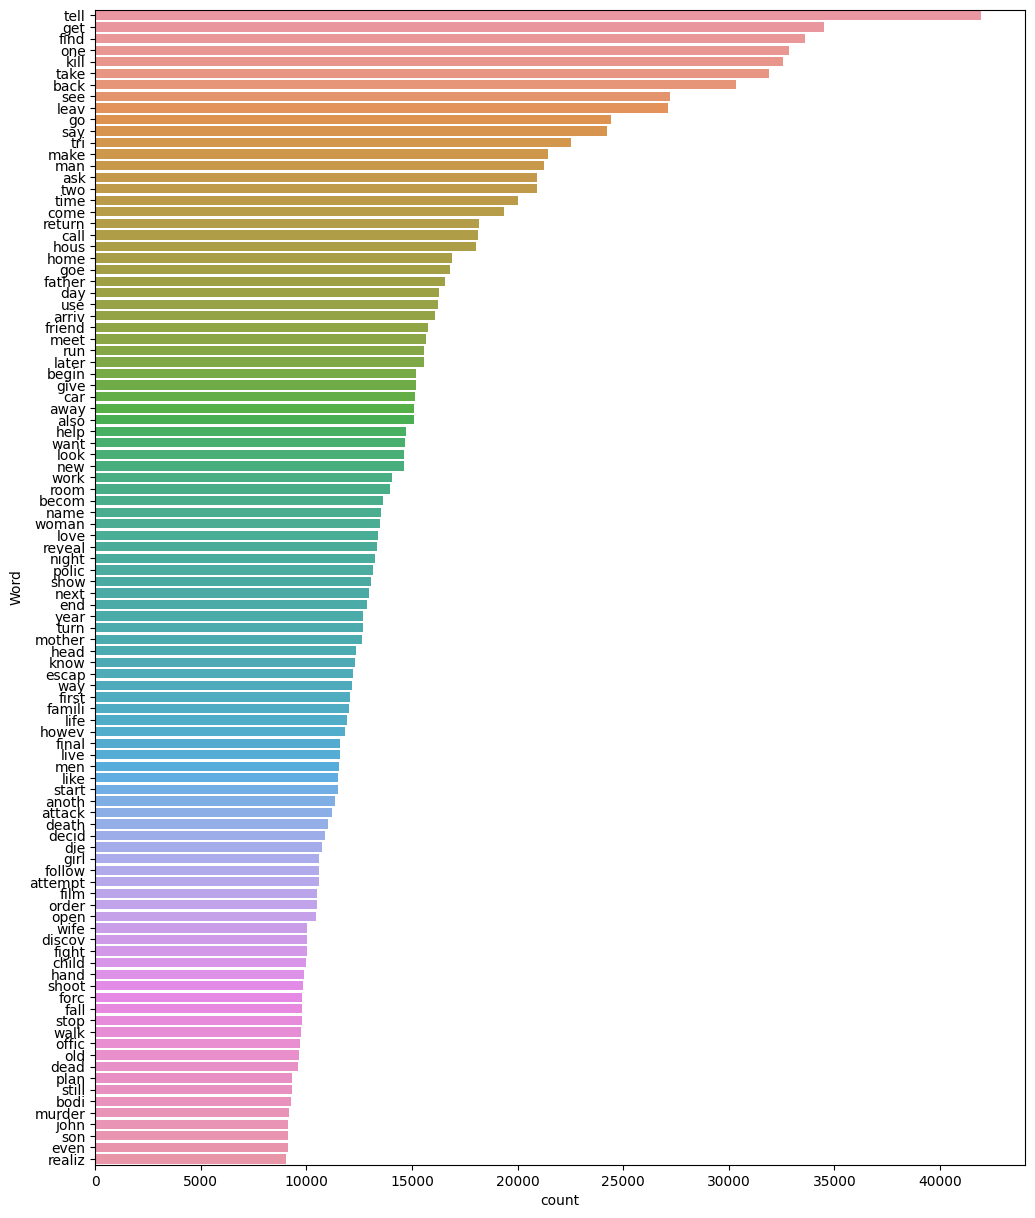

In [14]:
freq_words(New_movie_data['new_plot'], 100)

In [15]:
mlb.classes_

array([' absurd', ' action', ' adult comedy', ' allegory',
       ' alternate history', ' alternate reality', ' anti war',
       ' atmospheric', ' autobiographical', ' avant garde',
       ' blaxploitation', ' bleak', ' boring', ' brainwashing',
       ' christian film', ' claustrophobic', ' clever', ' comedy',
       ' comic', ' cruelty', ' cult', ' cute', ' dark', ' depressing',
       ' dramatic', ' entertaining', ' fantasy', ' feel-good',
       ' flashback', ' good versus evil', ' gothic', ' grindhouse film',
       ' haunting', ' historical', ' historical fiction', ' home movie',
       ' horror', ' humor', ' insanity', ' inspiring', ' intrigue',
       ' magical realism', ' melodrama', ' murder', ' mystery',
       ' neo noir', ' non fiction', ' paranormal', ' philosophical',
       ' plot twist', ' pornographic', ' prank', ' psychedelic',
       ' psychological', ' queer', ' realism', ' revenge', ' romantic',
       ' sadist', ' satire', ' sci-fi', ' sentimental', ' storytelli

In [16]:
New_movie_data = New_movie_data.join(pd.DataFrame(y, columns=mlb.classes_))

In [17]:
New_movie_data

,title,plot_synopsis,tags,split,new_plot,absurd,action,adult comedy,allegory,alternate history,...,sentimental,storytelling,stupid,suicidal,suspenseful,thought-provoking,tragedy,violence,western,whimsical
0,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"[cult, horror, gothic, murder, atmospheric]",train,note synopsi orgin italian releas segment cert...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",[violence],train,two thousand year ago nhagruul foul sorcer rev...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",[romantic],test,matuschek gift store budapest workplac alfr kr...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","[inspiring, romantic, stupid, feel-good]",train,glenn holland morn person anyon standard woken...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","[cruelty, murder, dramatic, cult, violence...",val,may cuban man name toni montana al pacino clai...,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14823,Lucky Numbers,"In 1988 Russ Richards (John Travolta), the wea...","[comedy, murder]",test,rus richard john travolta weatherman harrisbur...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14824,Iron Man 2,"In Russia, the media covers Tony Stark's discl...","[good versus evil, violence]",train,russia medium cover toni stark disclosur ident...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14825,Play Dirty,During the North African Campaign in World War...,[anti war],train,north african campaign world war ii captain do...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14826,High Wall,Steven Kenet catches his unfaithful wife in th...,[murder],test,steven kenet catch unfaith wife apart willard ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
# count가 적은 genre 삭제
drop_col = []
for i in range(5, New_movie_data.shape[1]): 
  if New_movie_data.iloc[:,i].sum() < 200:
    drop_col.append(i)
New_movie_data.drop(New_movie_data.columns[drop_col], axis=1, inplace=True)

In [64]:
New_movie_data.shape[1]

40

In [65]:
New_movie_data

,title,plot_synopsis,tags,split,new_plot,action,atmospheric,boring,comedy,cruelty,...,flashback,good versus evil,murder,paranormal,psychedelic,revenge,romantic,suspenseful,tragedy,violence
0,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"[cult, horror, gothic, murder, atmospheric]",train,note synopsi orgin italian releas segment cert...,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",[violence],train,two thousand year ago nhagruul foul sorcer rev...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",[romantic],test,matuschek gift store budapest workplac alfr kr...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","[inspiring, romantic, stupid, feel-good]",train,glenn holland morn person anyon standard woken...,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","[cruelty, murder, dramatic, cult, violence...",val,may cuban man name toni montana al pacino clai...,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14823,Lucky Numbers,"In 1988 Russ Richards (John Travolta), the wea...","[comedy, murder]",test,rus richard john travolta weatherman harrisbur...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14824,Iron Man 2,"In Russia, the media covers Tony Stark's discl...","[good versus evil, violence]",train,russia medium cover toni stark disclosur ident...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14825,Play Dirty,During the North African Campaign in World War...,[anti war],train,north african campaign world war ii captain do...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14826,High Wall,Steven Kenet catches his unfaithful wife in th...,[murder],test,steven kenet catch unfaith wife apart willard ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
# Use Multi Label Binarizer train set and validate set
mlb.fit(New_movie_data[(New_movie_data['split'] == 'train') | (New_movie_data['split'] == 'val')]['tags'])

MultiLabelBinarizer()

In [67]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

In [68]:
y = New_movie_data[New_movie_data['split'] == 'train'].iloc[:, 6:len(New_movie_data.columns)+1]
y.fillna(1, inplace=True)
y = np.array(y)

In [69]:
xtrain_tfidf = tfidf_vectorizer.fit_transform(New_movie_data[New_movie_data['split'] == 'train']['new_plot'])
xtrain_tfidf

<9489x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2333016 stored elements in Compressed Sparse Row format>

In [70]:
xtest_tfidf = tfidf_vectorizer.fit_transform(New_movie_data[New_movie_data['split'] == 'test']['new_plot'])
xtest_tfidf

<2966x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 740300 stored elements in Compressed Sparse Row format>

In [71]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

In [72]:
i = 0
t = []

while i <= y.shape[1]-1:
    s = []
    clf.fit(xtrain_tfidf, y[:,i])
    s.append(clf.predict(xtest_tfidf))
    i += 1
    t.append(s)

In [73]:
y_pred = np.array(t).reshape(np.array(t).shape[2], np.array(t).shape[0])
y_pred.shape

(2966, 34)

In [74]:
y_true = New_movie_data[New_movie_data['split'] == 'test'].iloc[:, 6:len(New_movie_data.columns)+1]
y_true.fillna(1, inplace=True)

In [75]:
y_true = np.array(y_true)

In [76]:
print(y_pred.shape)
print(y_true.shape)

(2966, 34)
(2966, 34)


In [77]:
sklearn.metrics.f1_score(y_true, y_pred, average='micro')

0.4313387258444253

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.37      0.45      0.41      1095
           1       0.37      0.46      0.41      1099
           2       0.38      0.46      0.42      1133
           3       0.37      0.46      0.41      1089
           4       0.43      0.46      0.44      1252
           5       0.39      0.47      0.43      1122
           6       0.48      0.46      0.47      1377
           7       0.37      0.46      0.41      1109
           8       0.36      0.45      0.40      1102
           9       0.37      0.46      0.41      1098
          10       0.40      0.46      0.43      1146
          11       0.37      0.46      0.41      1097
          12       0.56      0.47      0.51      1623
          13       0.39      0.47      0.43      1124
          14       0.43      0.48      0.45      1190
          15       0.42      0.48      0.45      1211
          16       0.42      0.46      0.44      1228
          17       0.39    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
sklearn.metrics.multilabel_confusion_matrix(y_true, y_pred)

array([[[1026,  845],
        [ 599,  496]],

       [[1014,  853],
        [ 590,  509]],

       [[1004,  829],
        [ 617,  516]],

       [[1029,  848],
        [ 590,  499]],

       [[ 967,  747],
        [ 682,  570]],

       [[1008,  836],
        [ 593,  529]],

       [[ 915,  674],
        [ 745,  632]],

       [[1006,  851],
        [ 601,  508]],

       [[ 997,  867],
        [ 605,  497]],

       [[1019,  849],
        [ 596,  502]],

       [[1033,  787],
        [ 616,  530]],

       [[1021,  848],
        [ 591,  506]],

       [[ 748,  595],
        [ 867,  756]],

       [[1027,  815],
        [ 593,  531]],

       [[1015,  761],
        [ 617,  573]],

       [[ 963,  792],
        [ 632,  579]],

       [[ 955,  783],
        [ 659,  569]],

       [[1009,  828],
        [ 591,  538]],

       [[1015,  832],
        [ 607,  512]],

       [[1031,  845],
        [ 579,  511]],

       [[ 995,  829],
        [ 618,  524]],

       [[ 853,  707],
        [ 76